In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [35]:
dataset = pd.read_csv('TabularKidneyStonePredictionDataset.csv')
dataset.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB


In [37]:
dataset.describe()

,id,gravity,ph,osmo,cond,urea,calc,target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,206.500000,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444
std,119.655756,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505
min,0.000000,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,103.250000,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,0.000000
50%,206.500000,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000
75%,309.750000,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,1.000000
max,413.000000,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [38]:
dataset.isnull().sum()

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

In [39]:
def outliers(df,feature):
    min, Q1, Q2, Q3, max = np.quantile(df[feature], [0, 0.25, 0.50, 0.75, 1])
    IQR = Q3 - Q1
    lower_fence = Q1 - (1.5 * IQR)
    higher_fence = Q3 + (1.5 * IQR)
    out = []
    for i in list(df[feature]):
        if i >= lower_fence and i <= higher_fence:
            pass
        else:
            if i not in out:
                out.append(i)
    print(out)
    for j in out:
        df[feature][df[feature] == j] = df[feature].median()

<Axes: >

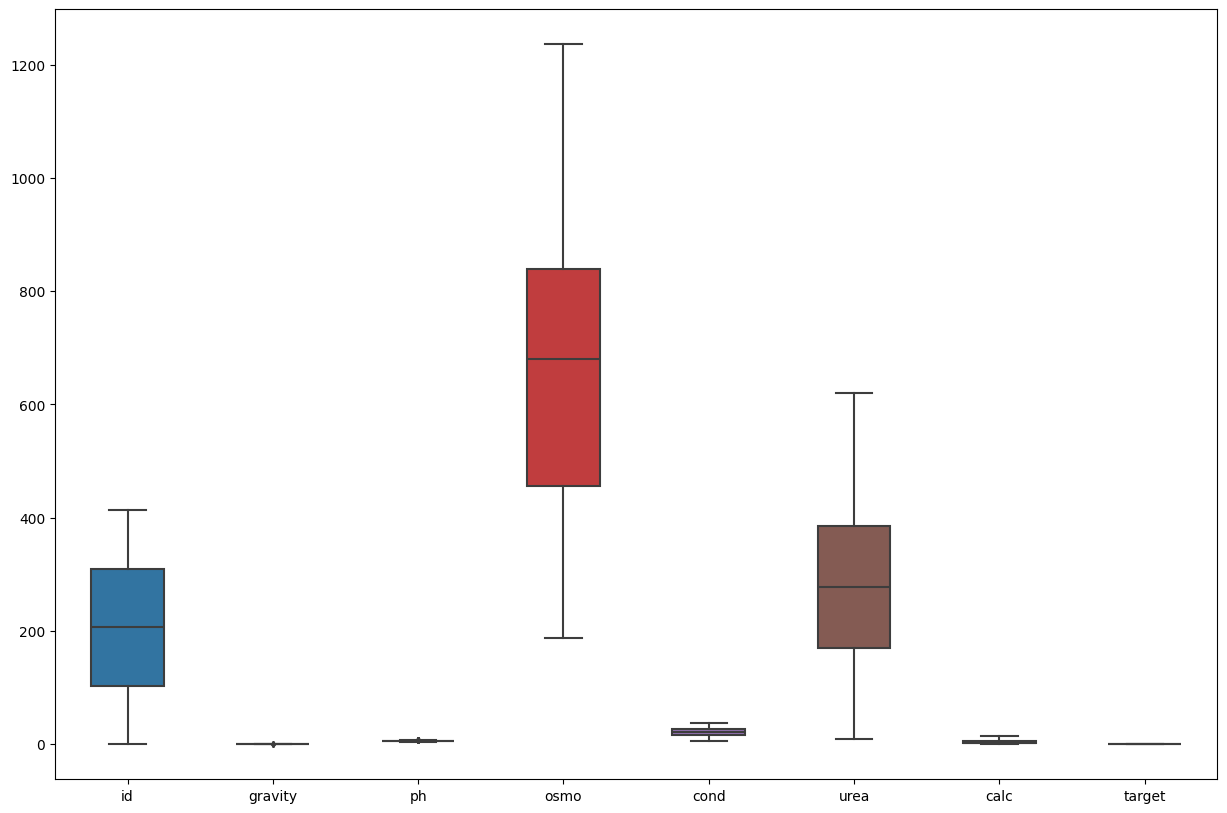

In [40]:
# Box Plot for checking outliers
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=dataset, width=0.5, ax=ax, fliersize=3)

<Axes: >

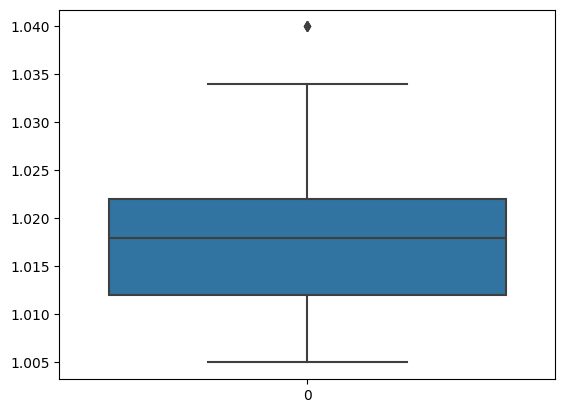

In [41]:
sns.boxplot(dataset['gravity'])

In [42]:
outliers(dataset,'gravity')

[1.04]


<Axes: >

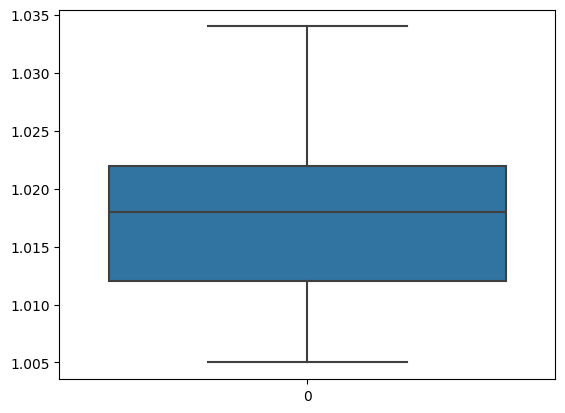

In [43]:
sns.boxplot(dataset['gravity'])

<Axes: >

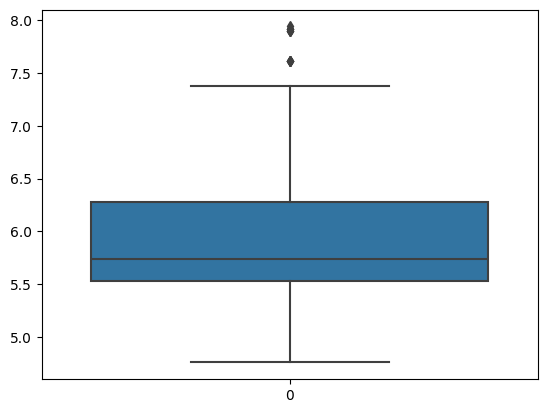

In [44]:
sns.boxplot(dataset['ph'])

In [45]:
outliers(dataset,'ph')

[7.61, 7.92, 7.9, 7.94]


<Axes: >

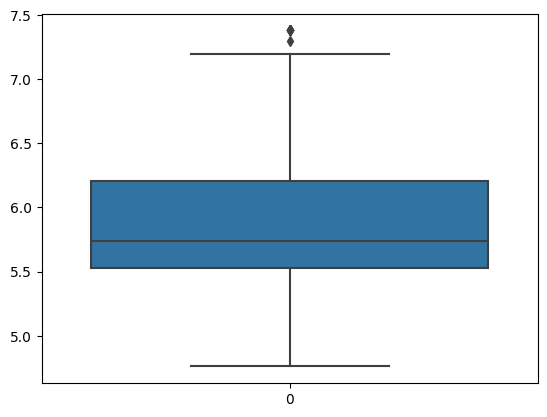

In [46]:
sns.boxplot(dataset['ph'])

<Axes: >

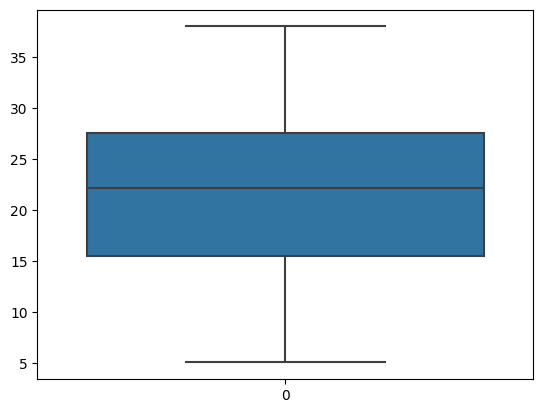

In [47]:
sns.boxplot(dataset['cond'])

<Axes: >

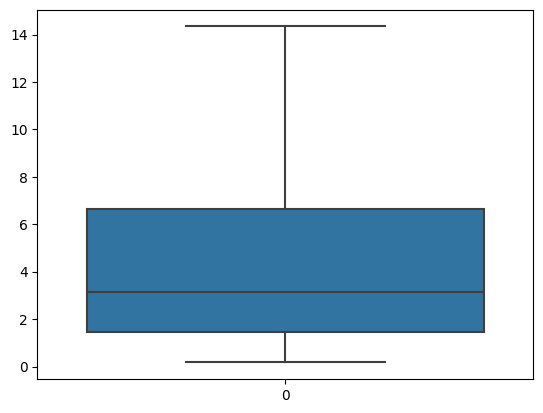

In [48]:
sns.boxplot(dataset['calc'])

In [49]:
outliers(dataset,'calc')

[]


<Axes: >

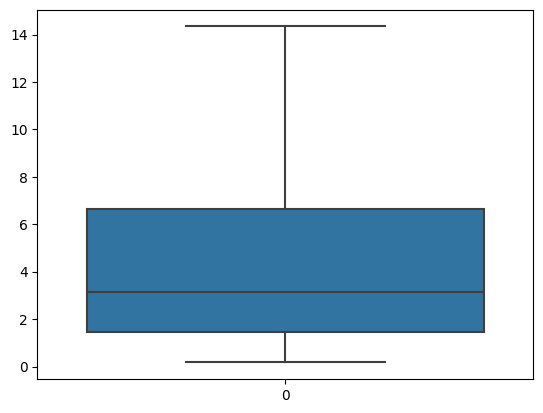

In [50]:
sns.boxplot(dataset['calc'])

In [51]:
dataset['target'].value_counts()

0    230
1    184
Name: target, dtype: int64

In [52]:
dataset

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1
...,...,...,...,...,...,...,...,...
409,409,1.011,5.21,527,21.4,75,1.53,0
410,410,1.024,5.53,577,19.7,224,0.77,0
411,411,1.018,6.28,455,22.2,270,7.68,1
412,412,1.008,7.12,325,12.6,75,1.03,1


In [53]:
dataset.columns.to_list()[:-1]

['id', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']

In [54]:
dataset['target'].value_counts()

0    230
1    184
Name: target, dtype: int64

In [55]:
!pip install imblearn

In [56]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [57]:
# Initialize SMOTE
smote = SMOTE(random_state=1)

# Apply SMOTE to the training data
X_resampled_smote, y_resampled_smote = smote.fit_resample(dataset[dataset.columns.to_list()[:-1]], dataset['target'])

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=1)

# Apply Random Over-Sampling to the SMOTE-resampled data
X_resampled_final, y_resampled_final = ros.fit_resample(X_resampled_smote, y_resampled_smote)

X, y = X_resampled_final, y_resampled_final

In [58]:
X.drop('id', axis=1, inplace=True)

In [59]:
X.shape, y.shape

((460, 6), (460,))

In [60]:
X.head()

,gravity,ph,osmo,cond,urea,calc
0,1.013,6.19,443,14.8,124,1.45
1,1.025,5.40,703,23.6,394,4.18
2,1.009,6.13,371,24.5,159,9.04
3,1.021,4.91,442,20.8,398,6.63
4,1.021,5.53,874,17.8,385,2.21


In [61]:
y.value_counts()

0    230
1    230
Name: target, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((368, 6), (92, 6), (368,), (92,))

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score

clf = LogisticRegression()
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
y_prob = clf.predict_proba(X_test_scaled)[:,1]

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print("Accuarcy: ",accuracy)
print("Confusion Matrix:\n",confusion)
print("ROC Curve: ",roc_auc_score(y_test, y_prob))

Accuarcy:  0.8260869565217391
Confusion Matrix:
 [[46  7]
 [ 9 30]]
ROC Curve:  0.8674407353652637
